In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import regex as re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup
import wordcloud
import warnings
import matplotlib.cm as cm
from matplotlib import rcParams
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('../data_csv/clean.csv')

In [3]:
df

,title,selftext,subreddit
0,What do you guys enjoy about your job?,"Call centre work is fucking hard, and for the ...",1
1,"Why the rich stay rich, maybe",TLDR at end \n\nI work in a credit card call c...,1
2,Speechless and sad,I am an occasional customer of various call ce...,1
3,Misogynistic Guy Demands A Pie Chart,I've never posted on reddit before! So if some...,1
4,Customer angry refunds are not instantaneous,I had to explain that refunds do not instantly...,1
...,...,...,...
5272,This ain't a bike road,Hey first tine poster. I thought this was wort...,0
5273,"Give me my $10,000",The place i work has a custom pos system and h...,0
5274,How to explain without making the customer sou...,I was working in hardware and a customer calle...,0
5275,Oh What a Night! (October 2019),So I had my previous post about an issue at th...,0


In [4]:
df.replace('\'','', regex=True, inplace=True) 

In [5]:
df = df.replace("[^a-zA-Z]", " ", regex=True)

In [6]:
df

,title,selftext,subreddit
0,What do you guys enjoy about your job,Call centre work is fucking hard and for the ...,1
1,Why the rich stay rich maybe,TLDR at end I work in a credit card call cen...,1
2,Speechless and sad,I am an occasional customer of various call ce...,1
3,Misogynistic Guy Demands A Pie Chart,Ive never posted on reddit before So if somet...,1
4,Customer angry refunds are not instantaneous,I had to explain that refunds do not instantly...,1
...,...,...,...
5272,This aint a bike road,Hey first tine poster I thought this was wort...,0
5273,Give me my,The place i work has a custom pos system and h...,0
5274,How to explain without making the customer sou...,I was working in hardware and a customer calle...,0
5275,Oh What a Night October,So I had my previous post about an issue at th...,0


In [8]:
call_raw_text = df.loc[df['subreddit'] == 1, 'selftext'].str.cat(sep = " ")

In [9]:
call_raw_text[:500]

'Call centre work is fucking hard  and for the most part  joyless  Ive worked on phones pretty much my whole working life  I was a alumni fundraiser in university  did a stint of survey phone calls  now I work on a helpdesk   Were working from home at the moment  and its so rubbish  were incredibly busy and understaffed and everyone is a pool of unhappiness     Just wanted to see if you guys can share anything you actually like about your jobs  to lift us all up  its a shit ride for any callcentr'

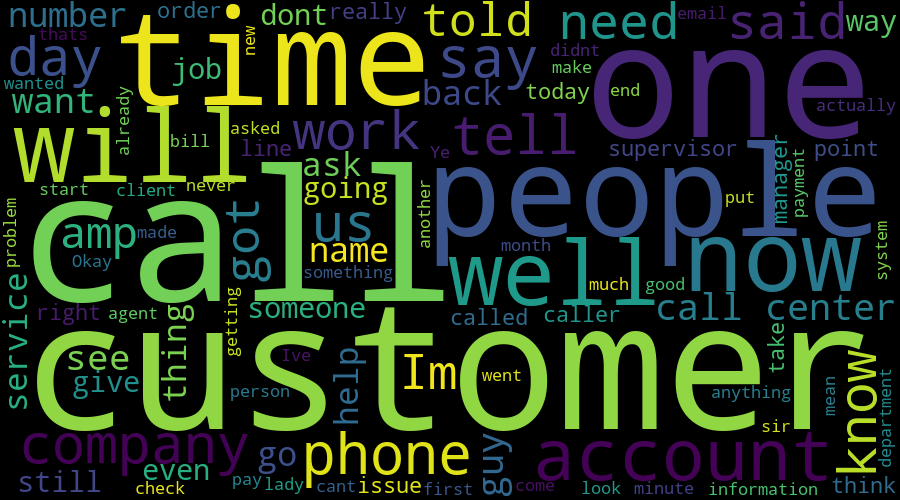

In [10]:
wc = wordcloud.WordCloud(max_words = 100,
                         width = 900,
                         height = 500,
                         background_color = 'black')
                        # color_func = lambda)
cloud = wc.generate(call_raw_text)
cloud.to_image()

In [11]:
retail_raw_text = df.loc[df['subreddit'] == 0, 'selftext'].str.cat(sep = " ")

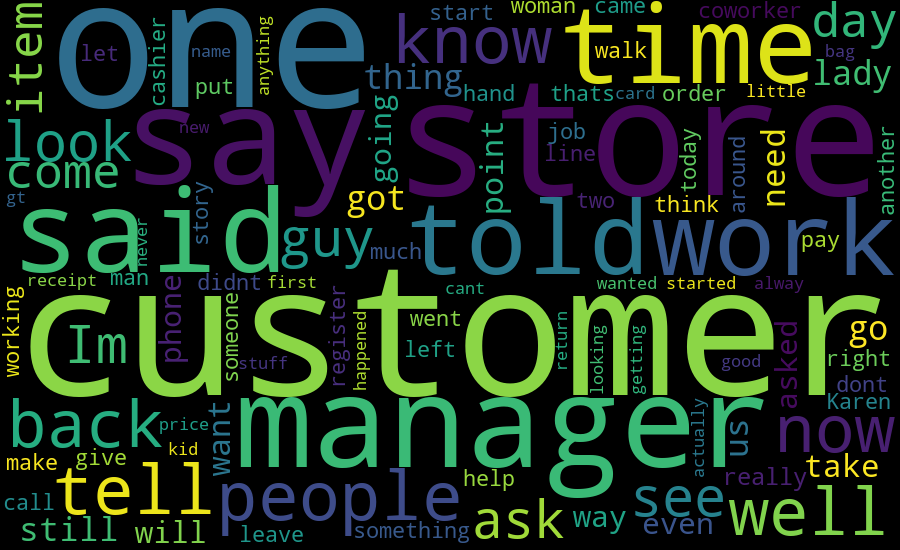

In [12]:
wc = wordcloud.WordCloud(max_words = 100,
                         width = 900,
                         height = 550,
                         background_color = 'black')
                        # color_func = lambda)
cloud = wc.generate(retail_raw_text)
cloud.to_image()

In [13]:
cv = CountVectorizer(stop_words = 'english', min_df = 5)

X_cv = cv.fit_transform(df['selftext'])

X_cv

<5277x8341 sparse matrix of type '<class 'numpy.int64'>'
	with 539531 stored elements in Compressed Sparse Row format>

In [14]:
df_features = pd.DataFrame(data = X_cv.todense(),
                          columns = cv.get_feature_names())
df_features.head()

,aa,ab,aback,abandoned,abc,abide,abilities,ability,able,abrasive,...,youtube,youve,yr,yrs,yup,zero,zip,ziplock,zone,zones
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,4,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df_features['covid'].sum()

30

In [16]:
df1 = df[df['selftext'].str.contains("covid")] 

In [17]:
df1

,title,selftext,subreddit
52,Either you have the person using Covid as a cr...,For context I work in sales for fitness equipm...,1
72,Sir please I can put you through,So I work for a big uk website hosting company...,1
89,To the ape that called me today,I work for a company that has to do with groce...,1
3420,Lady yells at me for daring to ask her shoe size,TL DR at the end Obligatory on mobile so plea...,0


In [18]:
df2 = df[df['title'].str.contains("covid")] 
df2

,title,selftext,subreddit
154,Really stressed about this covid stuff,I wipe down my area at the beginning of my shi...,1


In [53]:
df_features.shape

(5277, 8340)

In [19]:
df_features.drop(['just'], axis=1, inplace=True)

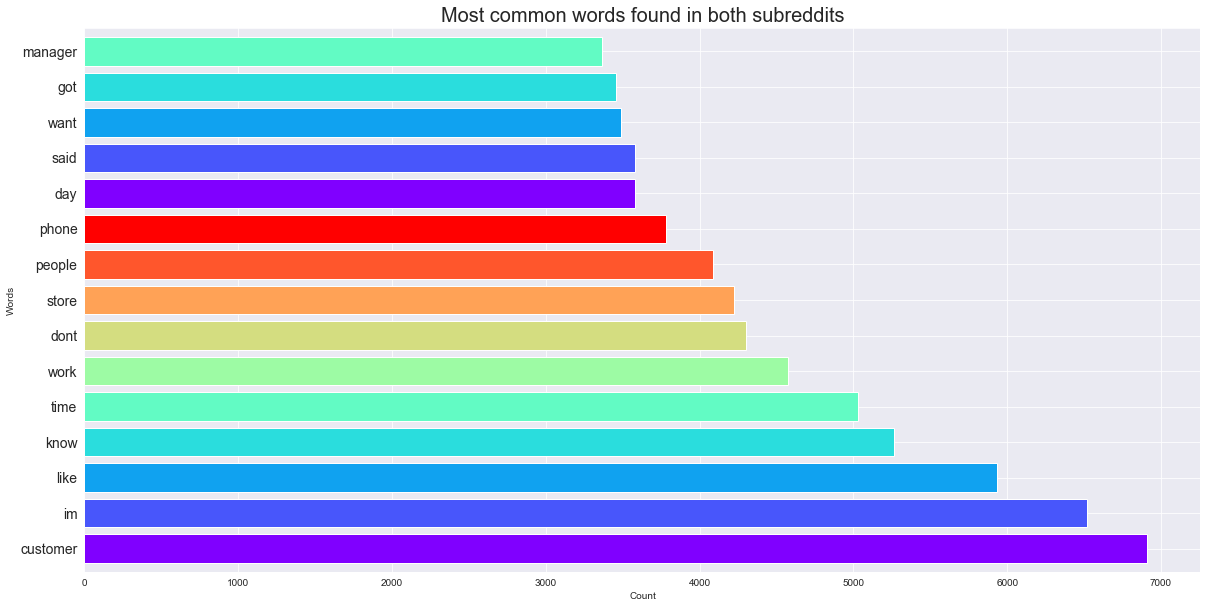

In [44]:
import matplotlib.cm as cm
from matplotlib import rcParams
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Most common words found in both subreddits', fontsize=20)
plt.xlabel('Count')
plt.ylabel('Words')
plt.yticks(fontsize=14)
df_features.sum().sort_values(ascending = False).head(15).plot.barh(color=colors, width =.8)

In [21]:
new_df_features = pd.merge(df_features, df['subreddit'], left_index=True, right_index=True)

In [22]:
new_df_features.head()

,aa,ab,aback,abandoned,abc,abide,abilities,ability,able,abrasive,...,youve,yr,yrs,yup,zero,zip,ziplock,zone,zones,subreddit_y
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,4,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
common_words = df_features.sum().sort_values(ascending = False).head(20).index

In [24]:
common_words

Index(['customer', 'im', 'like', 'know', 'time', 'work', 'dont', 'store',
       'people', 'phone', 'day', 'said', 'want', 'got', 'manager', 'going',
       'help', 'company', 'need', 'account'],
      dtype='object')

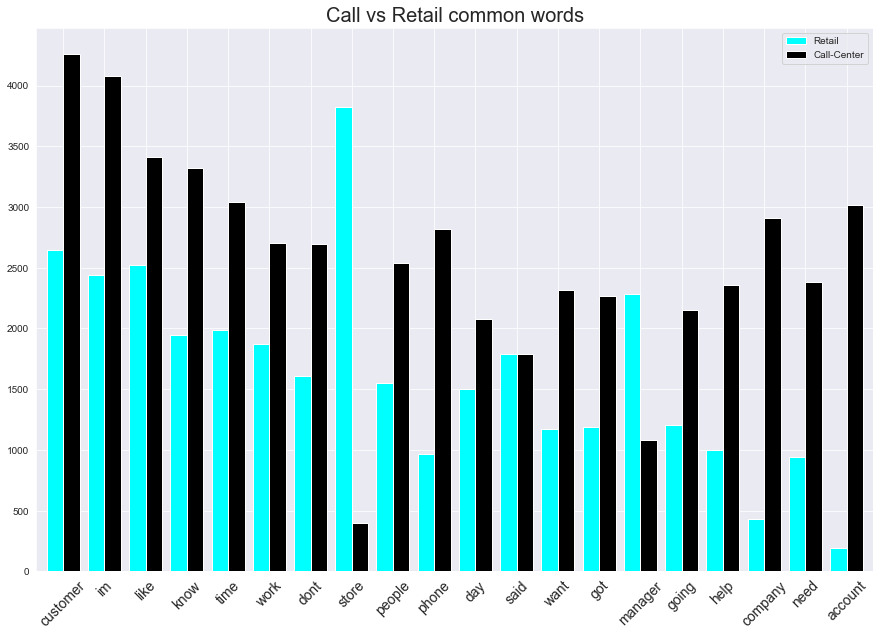

In [43]:
fig, ax = plt.subplots(figsize = (15,10))
new_df_features.groupby('subreddit_y').sum()[common_words].T.plot.bar(
ax = ax,
width=.8,
color = ['cyan', 'black']);
align='center'
ax.set_title('Call vs Retail common words', fontsize=20)
plt.xticks(fontsize=14, rotation=45)
ax.legend(['Retail','Call-Center' ])

In [32]:
df['length'] = pd.Series(data = [len(i) for i in df['selftext'].values], index = df.index)

In [33]:
df

,title,selftext,subreddit,length
0,What do you guys enjoy about your job,Call centre work is fucking hard and for the ...,1,1355
1,Why the rich stay rich maybe,TLDR at end I work in a credit card call cen...,1,2678
2,Speechless and sad,I am an occasional customer of various call ce...,1,714
3,Misogynistic Guy Demands A Pie Chart,Ive never posted on reddit before So if somet...,1,8519
4,Customer angry refunds are not instantaneous,I had to explain that refunds do not instantly...,1,3566
...,...,...,...,...
5272,This aint a bike road,Hey first tine poster I thought this was wort...,0,742
5273,Give me my,The place i work has a custom pos system and h...,0,1175
5274,How to explain without making the customer sou...,I was working in hardware and a customer calle...,0,272
5275,Oh What a Night October,So I had my previous post about an issue at th...,0,830


In [34]:
df['length'].groupby(df['subreddit']).mean()

subreddit
0    2127.107087
1    1913.632476
Name: length, dtype: float64

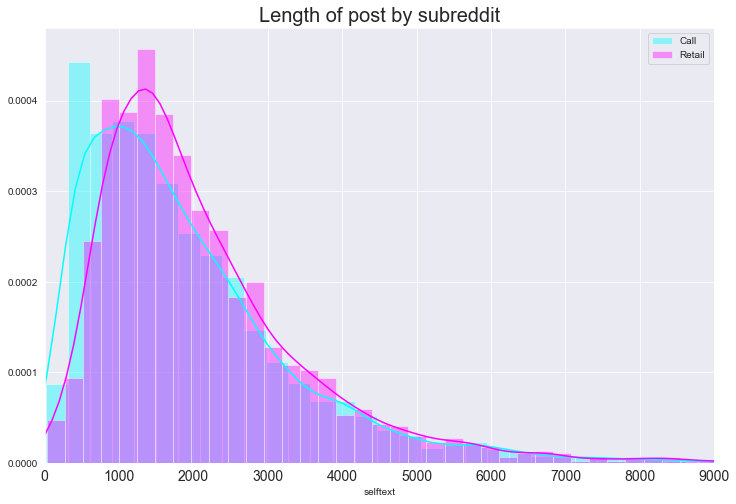

In [45]:
plt.figure(figsize = (12, 8))
plt.xlim(right = 9000)
sns.set_style("darkgrid")
sns.distplot(df.loc[df['subreddit'] == 1, 'selftext'].str.len(), color = 'cyan', label = 'Call');
sns.distplot(df.loc[df['subreddit'] == 0, 'selftext'].str.len(), color = 'magenta', label = 'Retail')
plt.title('Length of post by subreddit', fontsize=20)
plt.xticks(fontsize=14)
plt.legend();

I used code from https://www.datacamp.com/community/tutorials/wordcloud-python to assist with the wordcloud below

In [36]:
from PIL import Image

In [37]:
wine_mask = np.array(Image.open("../images/wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [38]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [39]:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))

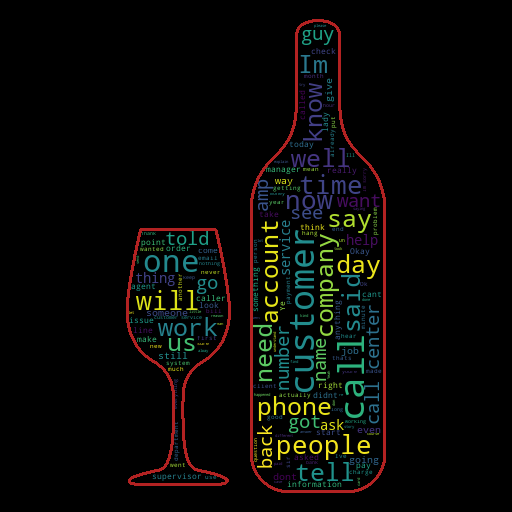

In [40]:
wc = wordcloud.WordCloud(max_words = 150,
                         width = 1800,
                         height = 1200,
                         mask=transformed_wine_mask,
                         contour_width=3,
                         contour_color='firebrick',
                         background_color = 'black')
                        # color_func = lambda)
cloud = wc.generate(call_raw_text)
cloud.to_image()

The sentiment analysis code below was inspired by https://medium.com/@himanshu_23732/sentiment-analysis-with-textblob-6bc2eb9ec4ab

In [46]:
from textblob import TextBlob

In [47]:
def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [48]:
df['Polarity']     = df['selftext'].apply(sentiment).apply(lambda x: x[0]).copy()
df['Subjectivity'] = df['selftext'].apply(sentiment).apply(lambda x: x[1]).copy()

In [54]:
df.tail()

,title,selftext,subreddit,length,Polarity,Subjectivity
5272,This aint a bike road,Hey first tine poster I thought this was wort...,0,742,-0.011905,0.461706
5273,Give me my,The place i work has a custom pos system and h...,0,1175,0.054487,0.287821
5274,How to explain without making the customer sou...,I was working in hardware and a customer calle...,0,272,-0.050000,0.400000
5275,Oh What a Night October,So I had my previous post about an issue at th...,0,830,0.026970,0.423333
5276,I Know You Just Told Me But When,So due to renovations at my job our photocopi...,0,1164,0.079586,0.467240


In [50]:
df['Polarity'].groupby(df['subreddit']).mean()

subreddit
0    0.040018
1    0.049928
Name: Polarity, dtype: float64

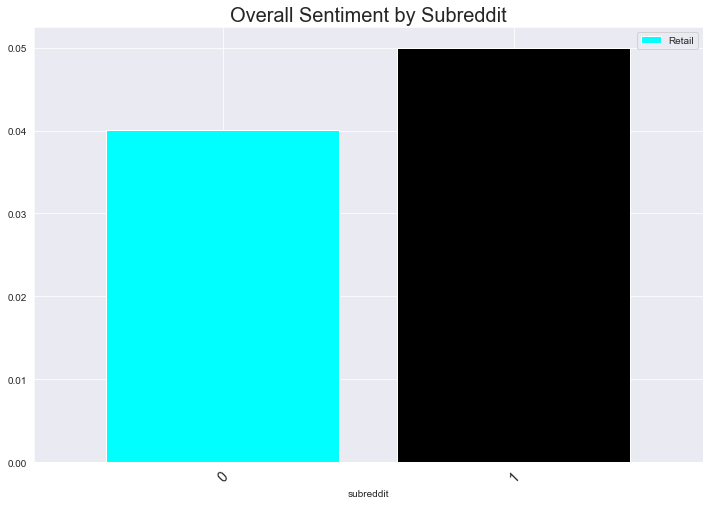

In [55]:
fig, ax = plt.subplots(figsize = (12,8))
df.groupby('subreddit')['Polarity'].mean().T.plot.bar(
ax = ax,
width=.8,
color = ['cyan', 'black']);
align='center'
ax.set_title('Overall Sentiment by Subreddit', fontsize=20)
plt.xticks(fontsize=14, rotation=45)
ax.legend(['Retail','Call-Center' ])